In [7]:
import numpy as np
import matplotlib.pyplot as plt

**Kada imamo ulaz i izlaz i trazimo funkciju koja opisuje odnos izmedju ta dva to je nadgledano masinko ucenje**
Pored ovoga imamo i nenadgledano i ucenje potkrepljivanjem

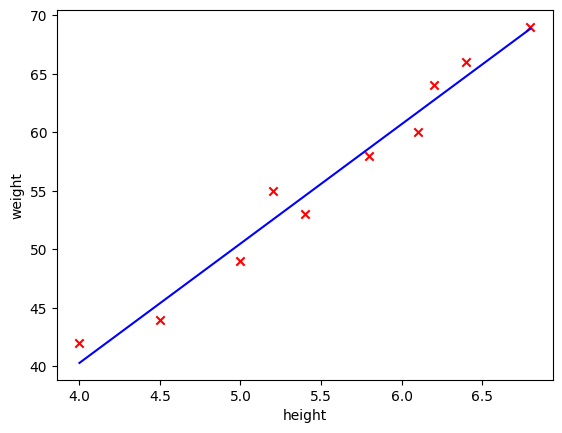

In [8]:
height = np.array([4.0, 4.5, 5.0, 5.2, 5.4, 5.8, 6.1, 6.2, 6.4, 6.8])
weight = np.array([42, 44, 49, 55, 53, 58, 60, 64, 66, 69])

N = height.shape[0]

X = np.ones((N, 2))
X[:,1] = height
y = weight

w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

f = lambda x: w[0] + w[1]*x

x0 = height[0]
x1 = height[-1]

y0 = f(x0)
y1 = f(x1)

plt.scatter(height, weight, color='red', marker = 'x')
plt.plot([x0,x1], [y0,y1], color='blue')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression

In [16]:
X = np.array([[4.0], [4.5], [5.0], [5.2], [5.4], [5.8], [6.1], [6.2], [6.4], [6.8]])
Y = weight
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

lin_reg.predict([[4.6], [5.1], [5.9], [6.3]])

array([46.41799544, 51.51480638, 59.66970387, 63.74715262])

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('auto-mpg.csv')

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [5]:
 df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
count,398.000000,398.000000,398.000000,396.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.189394,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.402030,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [8]:
df = df.replace('?', np.nan)
df = df.dropna()

In [10]:
X = df.drop('mpg', axis = 1)
Y = df[['mpg']]

In [11]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model-year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70


In [12]:
Y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [18]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
r2test = r2_score(Y_test, reg.predict(X_test))
r2train = r2_score(Y_train, reg.predict(X_train))
r2test, r2train

(0.7757849559316721, 0.8134917530842111)

In [25]:
mse_test = mean_squared_error(Y_test, reg.predict(X_test))
mse_train = mean_squared_error(Y_train, reg.predict(X_train))
mse_test, mse_train

(11.054880997716936, 12.041212192734282)

In [27]:
from sklearn.metrics import mean_absolute_error

In [28]:
mae = mean_absolute_error(Y_test, reg.predict(X_test))

In [29]:
mae

2.5979853023264647